In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# insert your path
path='./drive/MyDrive/Colab_Notebooks/Datamining_Project/'

**DATA EXPLORATION**

--------------------------------------------------------------------------------
Pressure

Read the dataset with all data about pressure

In [ ]:
# only to read the data
tot = pd.read_csv(path+'tot_pressure.csv',index_col=['Points:0','Points:1','Points:2'])

Notice that p 0 is always null

In [ ]:
(tot.iloc[:,:1]==0).any()

p 0    True
dtype: bool

Plot: temporal series (dots)

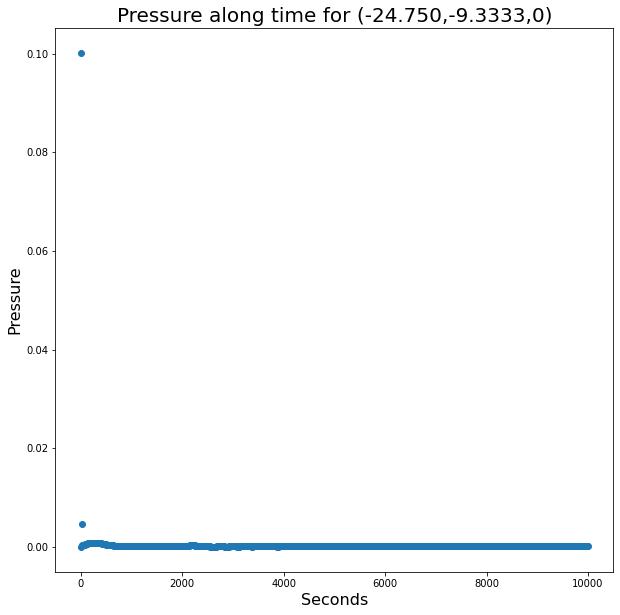

In [ ]:
plt.figure(figsize=(10, 10))

plt.scatter([i for i in range(0,10010,10)], [i for i in tot[:1].iloc[0]]) # insert in tot[i:i+1] the i-th point that we want to consider

# title
plt.title("Pressure along time for (-24.750,-9.3333,0)", fontsize=20)
# axes labels
labelx = plt.xlabel("Seconds",fontsize=16)
label = plt.ylabel("Pressure",fontsize=16)

plt.show()

Plot: temporal series (line)

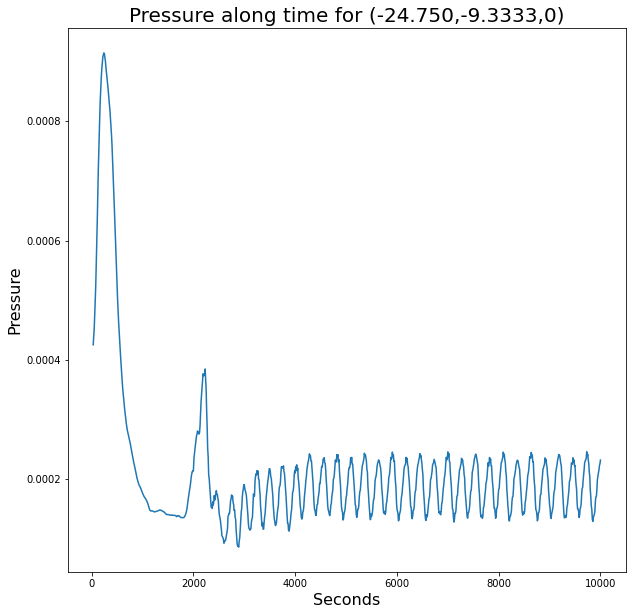

In [ ]:
plt.figure(figsize=(10, 10))


plt.plot([i for i in range(30,10010,10)], [i for i in tot[:1].iloc[:,3:].iloc[0]]) # insert in tot[i:i+1] the i-th point that we want to consider
# with .iloc[:,:3] we exclude the first 20 seconds (first 3 values of time we have)

# title
plt.title("Pressure along time for (-24.750,-9.3333,0)", fontsize=20)
# axes lables
labelx = plt.xlabel("Seconds",fontsize=16)
label = plt.ylabel("Pressure",fontsize=16)

plt.show()

--------------------------------------------------------------------------------
Velocity

Read the dataset with all data about pressure

In [ ]:
# only to read the data
tot1 = pd.read_csv(path+'tot_velocity_x.csv',index_col=['Points:0','Points:1','Points:2'])
tot2 = pd.read_csv(path+'tot_velocity_y.csv',index_col=['Points:0','Points:1','Points:2'])

Notice that at second 0, velocities are null

In [ ]:
(tot1.iloc[:,:1]==0).any()

U:0 0    True
dtype: bool

In [ ]:
(tot2.iloc[:,:1]==0).any()

U:1 0    True
dtype: bool

Plot: scatterplot with velocity along time for a point

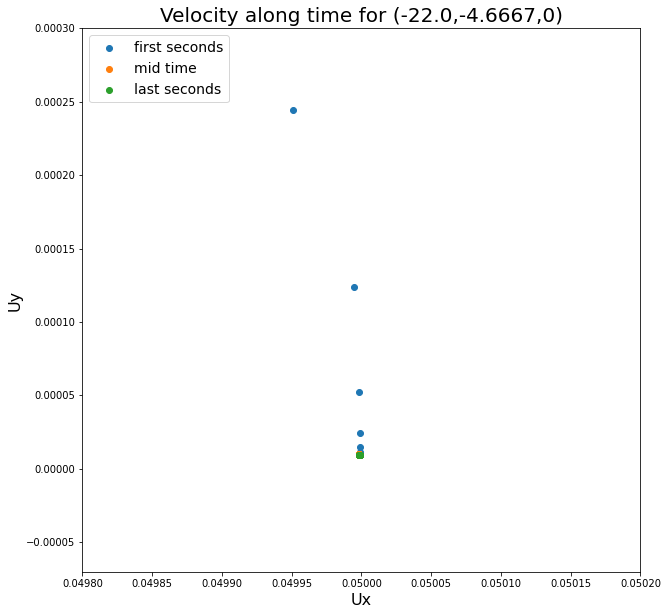

In [ ]:
plt.figure(figsize=(10, 10))

# considering a set of beginning seconds/middle seconds/last seconds
plt.scatter(tot1[:1].iloc[:,:30], tot2[:1].iloc[:,:30], label='first seconds') # insert in tot1[i:i+1] the i-th point that we want to consider
plt.scatter(tot1[:1].iloc[:,500:550], tot2[:1].iloc[:,500:550], label='mid time') # insert in tot1[i:i+1] the i-th point that we want to consider
plt.scatter(tot1[:1].iloc[:,990:1001], tot2[:1].iloc[:,990:1001], label='last seconds') # insert in tot1[i:i+1] the i-th point that we want to consider

# title
plt.title("Velocity along time for (-22.0,-4.6667,0)", fontsize=20)
# axes lables
labelx = plt.xlabel("Ux",fontsize=16)
label = plt.ylabel("Uy",fontsize=16)

ax = plt.gca()
# axes limits
ax.set_xlim([0.0498, 0.0502])
ax.set_ylim([-0.00007, 0.0003])
# legend
plt.legend(loc="upper left",fontsize=14)
plt.show()

**PERFORMANCES**

Insert the files names in which you are interested in

In [ ]:
data_real = "data/dataFile0.890.csv"
data_pred = 'dataCNN/dataPred_890.csv'
path_real = path + data_real
path_pred = path + data_pred

Read the files

In [ ]:
real=pd.read_csv(data_real, index_col=None, header=0)
pred=pd.read_csv(data_pred, index_col=None, header=0)

**SCATTERPLOTS**

--------------------------------------------------------------------------------
Pressure

No handles with labels found to put in legend.


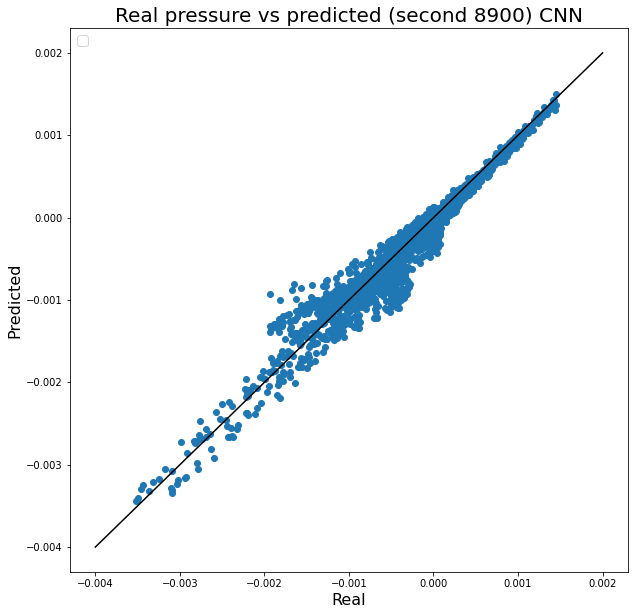

In [ ]:
plt.figure(figsize=(10, 10))

plt.scatter(real['p'], pred['Predicted p'])
# limits of axes
plt.plot([-0.004,0.002], [-0.004,0.002], color='k')

# title
plt.title("Real pressure vs predicted (second 8900) CNN", fontsize=20)
# axes labels
labelx = plt.xlabel("Real",fontsize=16)
label = plt.ylabel("Predicted",fontsize=16)
# legend
plt.legend(loc="upper left",fontsize=14)
plt.show()

--------------------------------------------------------------------------------
Velocity

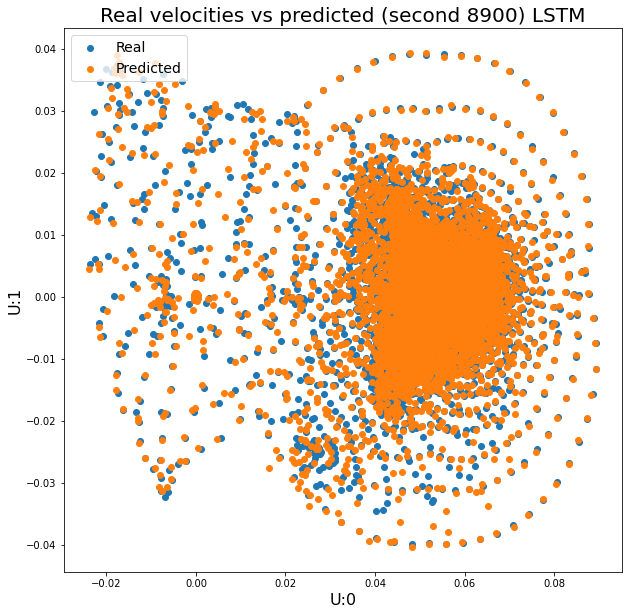

In [ ]:
plt.figure(figsize=(10, 10))

# dots for every points velocities (real and predicted)
plt.scatter(real['U:0'], real['U:1'], label='Real')
plt.scatter(pred['Predicted U:0'], pred['Predicted U:1'], label='Predicted')

#title
plt.title("Real velocities vs predicted (second 8900) LSTM", fontsize=20)
# axes labels
labelx = plt.xlabel("U:0",fontsize=16)
label = plt.ylabel("U:1",fontsize=16)
#legend
plt.legend(loc="upper left",fontsize=14)

plt.show()

**COMPARING PREDICTED AND REAL TIME SERIES ABOUT PRESSURE**

Read the dataset with predicted data (LSTM or CNN)

In [ ]:
# only to read the data
tot_pred = pd.read_csv(path+'Y_pres_lstm.csv',index_col=['Points:0','Points:1','Points:2'])

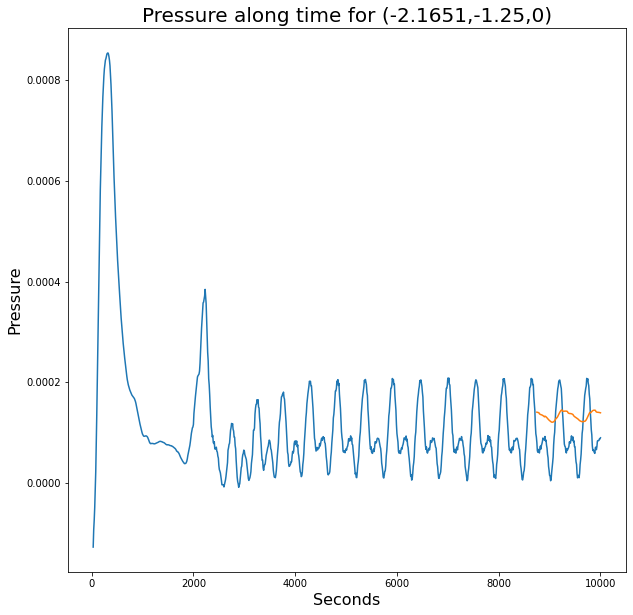

In [ ]:
plt.figure(figsize=(10, 10))


plt.plot([i for i in range(30,10010,10)], [i for i in tot[3000:3001].iloc[:,3:].iloc[0]]) # insert in tot[i:i+1] the i-th point that we want to consider
# with .iloc[:,:3] we exclude the first 20 seconds (first 3 values of time we have)
plt.plot([i for i in range(8750,10010,10)], [i for i in tot_pred['3000']]) # insert in tot_pred['i'] the i-th point that we want to consider

# title
plt.title("Pressure along time for (-2.1651,-1.25,0)", fontsize=20)
# axes labels
labelx = plt.xlabel("Seconds",fontsize=16)
label = plt.ylabel("Pressure",fontsize=16)

plt.show()

**COMPARING VELOCITY VECTORS**

In [ ]:
real_vec = np.array(real[['U:0','U:1']])
pred_vec = np.array(pred[['Predicted U:0','Predicted U:1']])

Choose which points consider

In [ ]:
vec1=real_vec[100:500]
vec2=pred_vec[100:500]

Plot

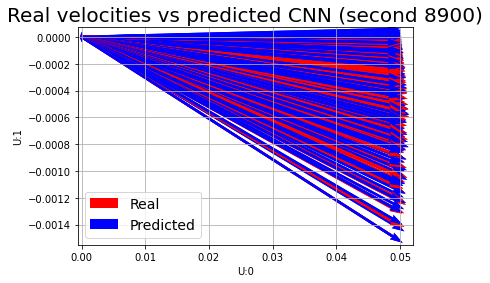

In [ ]:
plt.figure()
# Axes labels
plt.ylabel('U:1')
plt.xlabel('U:0')
ax = plt.gca()
# create a vector for each point
for i in range(len(vec1)):
  if i==0:
    ax.quiver(np.array([0,0]), np.array([0,0]), vec1[i,0], vec1[i,1], angles='xy', scale_units='xy',color='r',scale=1,label='Real')
    ax.quiver(np.array([0,0]), np.array([0,0]), vec2[i,0], vec2[i,1], angles='xy', scale_units='xy',color='b',scale=1,label='Predicted')
  else:
    ax.quiver(np.array([0,0]), np.array([0,0]), vec1[i,0], vec1[i,1], angles='xy', scale_units='xy',color='r',scale=1)
    ax.quiver(np.array([0,0]), np.array([0,0]), vec2[i,0], vec2[i,1], angles='xy', scale_units='xy',color='b',scale=1)

# to choose the limits of axes
max_ax1=np.amax(vec1[:,0])
max_ax2=np.amax(vec2[:,0])
max_axx=max(max_ax1,max_ax2)

max_ay1=np.amax(vec1[:,1])
max_ay2=np.amax(vec2[:,1])
max_axy=max(max_ay1,max_ay2)

min_ay1=np.amin(vec1[:,1])
min_ay2=np.amin(vec2[:,1])
min_axy=min(min_ay1,min_ay2,-0.0005)

min_ax1=np.amin(vec1[:,0])
min_ax2=np.amin(vec2[:,0])
min_axx=min(min_ax1,min_ax2,-0.0005)

ax.set_ylim([min_axy*1.01, max_axy*1.2])
ax.set_xlim([min_axx*1.2, max_axx*1.01])

# title
ax.set_title('Real velocities vs predicted CNN (second 8900)', fontsize=20)
# legend
plt.legend(loc="lower left",fontsize=14)
# grid
plt.grid()
plt.draw()
plt.show()